In [1]:
import pandas as pd
import tensorflow as tf
import custom_metrics as cm
import sklearn as sk
import numpy as np
import math
import seaborn as sns
import data_preprocessing as dp
import expenditure_predictor as ep
import matplotlib.pyplot as plt
import feature_selection as fs
import keras
from keras.models import load_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from tensorflow.python.keras import layers
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import svm

Using TensorFlow backend.


In [7]:
# Esta función tiene la red con la configuración obtenida por el algoritmo evolutivo.
def get_model(train_dataset):
    
    model = keras.Sequential([
        layers.Dense(27, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(36, activation=tf.nn.relu),
        layers.Dense(27, activation=tf.nn.relu),
        layers.Dense(53, activation=tf.nn.relu),
        layers.Dense(45, activation=tf.nn.relu),
        layers.Dense(56, activation=tf.nn.relu),
        layers.Dense(20, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adadelta(lr=0.043)
    model.compile(loss='mae',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'], )
    return model

# Comparación entre modelos - Especificación lin-lin

En este notebook aprovecharemos para llevar a cabo la comparación entre todos los conjuntos de variables obtenidos en el notebook seleccion_de_caracteristicas

# Subconjunto Literatura con selección por correlación 0.1


### Subconjunto Literatura - Regresión Lineal con constante

In [8]:
literatura_corr1 = ['NOCHES', 'PERSONAS_TOTAL', 'INGRESOS', 'EDAD', 'ACTIV_PISCINA',
                    'ACTIV_PARQUES_OCIO', 'ALOJ_CATEG_HOTEL4', 'ALOJ_CATEG_HOTEL5',
                    'ALOJ_CATEG_PROPIA', 'PAQUETE_TURISTICO_ALGUNO_GRATIS',
                    'PAQUETE_TURISTICO_SI', 'NACIONALIDAD_ESP724']

#### Antes de evaluar los modelos con estas variables, vamos a echar un vistazo a su FIV para asegurarnos de que no haya multicolinealidad

In [9]:
X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=literatura_corr1, dummies=True, desglose=False)
print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)
fs.check_vif(X)
print(X.head)

C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


(35767, 15)
         VIF                        variables
0   1.136865                           NOCHES
1   1.094268                   PERSONAS_TOTAL
2   1.084179                         INGRESOS
3   1.149057                             EDAD
4   1.208634                    ACTIV_PISCINA
5   1.079405               ACTIV_PARQUES_OCIO
6   1.227226                ALOJ_CATEG_HOTEL4
7   1.085073                ALOJ_CATEG_HOTEL5
8   2.198275                ALOJ_CATEG_PROPIA
9   2.238674  PAQUETE_TURISTICO_ALGUNO_GRATIS
10  1.350105             PAQUETE_TURISTICO_SI
11  1.333411              NACIONALIDAD_ESP724
12  1.265152              NACIONALIDAD_GBR826
13  1.285426              NACIONALIDAD_DEU276
<bound method NDFrame.head of          NOCHES  PERSONAS_TOTAL  INGRESOS      EDAD  ACTIV_PISCINA  \
0     -0.353816       -0.405225 -1.549827 -0.107326       0.851542   
1     -0.096492        0.440875 -0.414888 -0.242379       0.851542   
2      0.418155       -0.405225 -1.549827  1.715889      -

En principio parece que no hemos detectado ningún FIV alarmante (en torno a 5), por lo que procederemos a predecir con nuestro subconjunto.

In [11]:
X['GASTO'] = y

train_dataset, test_dataset = dp.split_dataset(X)
train_labels = train_dataset.pop('GASTO')
test_labels = test_dataset.pop('GASTO')

### Subconjunto Literatura por correlación 0.1 - Regresión Lineal con constante

----Resultados sobre TRAIN----
R2:  0.5063263182214464
Adjusted R2:  0.5061053692366133
MAPE: 59.21196196366437
----Resultados sobre TEST----
R2:  0.5044853791796562
Adjusted R2:  0.5038194394943785
MAPE: 59.45415516367362


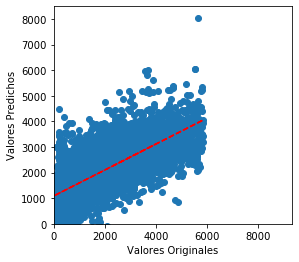

0.5044853791796562

In [24]:
lr = LinearRegression(fit_intercept=True)
lr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, lr)

### Subconjunto Literatura con correlación 0.1 - Red Neuronal 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________
None
Train on 17972 samples, validate on 8853 samples
Epoch 1/250
 - 1s - loss: 673.1383 - mean_absolute_error: 673.1382 - mean_squared_error: 844994.1250 - val_loss: 637.7649 - val_mean_absolute_error: 637.7650 - val_mean_squared_error: 765896.8125
Epoch 2/250
 - 1s - lo

Epoch 38/250
 - 1s - loss: 620.3913 - mean_absolute_error: 620.3915 - mean_squared_error: 715462.0000 - val_loss: 622.9712 - val_mean_absolute_error: 622.9709 - val_mean_squared_error: 727990.4375
Epoch 39/250
 - 1s - loss: 620.1807 - mean_absolute_error: 620.1808 - mean_squared_error: 714173.8125 - val_loss: 622.8371 - val_mean_absolute_error: 622.8371 - val_mean_squared_error: 727839.1250
Epoch 40/250
 - 1s - loss: 619.8119 - mean_absolute_error: 619.8120 - mean_squared_error: 713694.8125 - val_loss: 623.1390 - val_mean_absolute_error: 623.1388 - val_mean_squared_error: 733277.1875
Epoch 41/250
 - 1s - loss: 619.4442 - mean_absolute_error: 619.4443 - mean_squared_error: 713944.9375 - val_loss: 623.1722 - val_mean_absolute_error: 623.1723 - val_mean_squared_error: 727251.1875
Epoch 42/250
 - 1s - loss: 619.2926 - mean_absolute_error: 619.2926 - mean_squared_error: 712114.7500 - val_loss: 627.1855 - val_mean_absolute_error: 627.1859 - val_mean_squared_error: 730337.8750
Epoch 43/250
 -

Epoch 80/250
 - 1s - loss: 613.3297 - mean_absolute_error: 613.3297 - mean_squared_error: 699532.5000 - val_loss: 620.0866 - val_mean_absolute_error: 620.0864 - val_mean_squared_error: 722943.1875
Epoch 81/250
 - 1s - loss: 613.3647 - mean_absolute_error: 613.3646 - mean_squared_error: 699050.3125 - val_loss: 620.1137 - val_mean_absolute_error: 620.1140 - val_mean_squared_error: 722520.1875
Epoch 82/250
 - 1s - loss: 613.2869 - mean_absolute_error: 613.2869 - mean_squared_error: 699829.8125 - val_loss: 619.5397 - val_mean_absolute_error: 619.5399 - val_mean_squared_error: 719538.1250
Epoch 83/250
 - 1s - loss: 612.9603 - mean_absolute_error: 612.9604 - mean_squared_error: 697383.5625 - val_loss: 621.1192 - val_mean_absolute_error: 621.1194 - val_mean_squared_error: 724705.0625
Epoch 84/250
 - 1s - loss: 612.9582 - mean_absolute_error: 612.9584 - mean_squared_error: 698684.9375 - val_loss: 620.1385 - val_mean_absolute_error: 620.1382 - val_mean_squared_error: 721123.2500
Epoch 85/250
 -

Epoch 122/250
 - 1s - loss: 609.9821 - mean_absolute_error: 609.9819 - mean_squared_error: 692391.5625 - val_loss: 619.0832 - val_mean_absolute_error: 619.0832 - val_mean_squared_error: 717749.3125
Epoch 123/250
 - 1s - loss: 609.7282 - mean_absolute_error: 609.7283 - mean_squared_error: 692322.3125 - val_loss: 618.6070 - val_mean_absolute_error: 618.6071 - val_mean_squared_error: 717337.0000
Epoch 124/250
 - 1s - loss: 609.6816 - mean_absolute_error: 609.6815 - mean_squared_error: 692203.0625 - val_loss: 619.7611 - val_mean_absolute_error: 619.7613 - val_mean_squared_error: 723305.2500
Epoch 125/250
 - 1s - loss: 609.8740 - mean_absolute_error: 609.8738 - mean_squared_error: 692270.5000 - val_loss: 619.1924 - val_mean_absolute_error: 619.1924 - val_mean_squared_error: 716863.4375
Epoch 126/250
 - 1s - loss: 609.5803 - mean_absolute_error: 609.5803 - mean_squared_error: 691992.1875 - val_loss: 618.5025 - val_mean_absolute_error: 618.5024 - val_mean_squared_error: 717805.1250
Epoch 127/

Epoch 164/250
 - 1s - loss: 606.8524 - mean_absolute_error: 606.8522 - mean_squared_error: 687451.1875 - val_loss: 617.1936 - val_mean_absolute_error: 617.1938 - val_mean_squared_error: 712279.8750
Epoch 165/250
 - 1s - loss: 606.5778 - mean_absolute_error: 606.5777 - mean_squared_error: 686516.6250 - val_loss: 617.4247 - val_mean_absolute_error: 617.4250 - val_mean_squared_error: 713502.6875
Epoch 166/250
 - 1s - loss: 606.7118 - mean_absolute_error: 606.7117 - mean_squared_error: 686798.5625 - val_loss: 617.3231 - val_mean_absolute_error: 617.3231 - val_mean_squared_error: 716061.3750
Epoch 167/250
 - 1s - loss: 606.6580 - mean_absolute_error: 606.6578 - mean_squared_error: 687082.1875 - val_loss: 617.3680 - val_mean_absolute_error: 617.3677 - val_mean_squared_error: 713742.4375
Epoch 168/250
 - 1s - loss: 606.6043 - mean_absolute_error: 606.6044 - mean_squared_error: 686676.8125 - val_loss: 616.9309 - val_mean_absolute_error: 616.9310 - val_mean_squared_error: 715016.6875
Epoch 169/

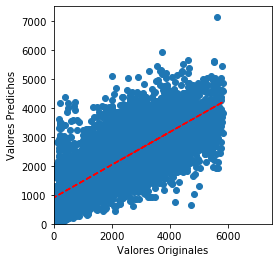

0.5353538763040351

In [25]:
model = ep.build_model(train_dataset)
print(model.summary())
ep.train_model(model, train_dataset, train_labels, 250)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, model)

### Subconjunto Literatura por correlación 0.1 - Random Forest

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  5.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


----Resultados sobre TRAIN----
R2:  0.8551168051878216
Adjusted R2:  0.8550519611501614
MAPE: 26.009002286553795
----Resultados sobre TEST----
R2:  0.4592994681401438
Adjusted R2:  0.45857280150532254
MAPE: 55.03678315093373


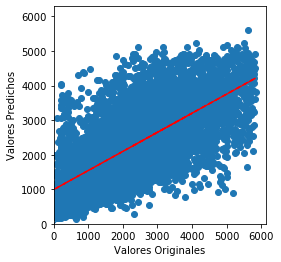

0.4592994681401438

In [26]:
regressor = RandomForestRegressor(100, criterion="mae", verbose=1, n_jobs=4)
regressor.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, regressor)

### Subconjunto Literatura por correlación 0.1 - Regresión de Soporte Vectorial

----Resultados sobre TRAIN----
R2:  0.5018780043618141
Adjusted R2:  0.5016550644860995
MAPE: 57.41714227253283
----Resultados sobre TEST----
R2:  0.5003814488868057
Adjusted R2:  0.49970999378395453
MAPE: 57.52015585855603


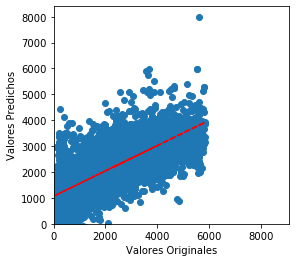

0.5003814488868057

In [27]:
svr = svm.SVR(kernel='linear')
svr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, svr)

# Subconjunto Literatura con RFE DecisionTreee


### Subconjunto Literatura RFE - Regresión Lineal con constante

In [14]:
literatura_rfe = ['NOCHES', 'PERSONAS_TOTAL', 'INGRESOS', 'EDAD', 'ACTIV_PISCINA',
                  'ACTIV_PASEAR', 'ACTIV_ISLA', 'SEXO', 'ACTIV_GASTRONOMIA_CANARIA',
                  'ISLA_ES705', 'ISLA_ES709', 'PAQUETE_TURISTICO_PAGADO_POR_SEPARADO']

#### Antes de evaluar los modelos con estas variables, vamos a echar un vistazo a su FIV para asegurarnos de que no haya multicolinealidad

In [15]:
X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=literatura_rfe, dummies=True, desglose=False)
print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)
fs.check_vif(X)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


(35767, 13)
         VIF                              variables
0   1.048762                                 NOCHES
1   1.064137                         PERSONAS_TOTAL
2   1.047677                               INGRESOS
3   1.122442                                   EDAD
4   1.090171                          ACTIV_PISCINA
5   1.113979                           ACTIV_PASEAR
6   1.148693                             ACTIV_ISLA
7   1.024825                                   SEXO
8   1.093536              ACTIV_GASTRONOMIA_CANARIA
9   1.282467                             ISLA_ES705
10  1.292805                             ISLA_ES709
11  1.034764  PAQUETE_TURISTICO_PAGADO_POR_SEPARADO


En principio parece que no hemos detectado ningún FIV alarmante (en torno a 5), por lo que procederemos a predecir con nuestro subconjunto.

In [16]:
X['GASTO'] = y

train_dataset, test_dataset = dp.split_dataset(X)
train_labels = train_dataset.pop('GASTO')
test_labels = test_dataset.pop('GASTO')

### Subconjunto Literatura RFE  - Red Neuronal 

Train on 17972 samples, validate on 8853 samples
Epoch 1/250
 - 1s - loss: 783.7345 - mean_absolute_error: 783.7346 - mean_squared_error: 1090451.5000 - val_loss: 755.9386 - val_mean_absolute_error: 755.9389 - val_mean_squared_error: 1019074.3125
Epoch 2/250
 - 1s - loss: 744.2785 - mean_absolute_error: 744.2785 - mean_squared_error: 980869.2500 - val_loss: 752.9904 - val_mean_absolute_error: 752.9904 - val_mean_squared_error: 997133.9375
Epoch 3/250
 - 1s - loss: 738.5626 - mean_absolute_error: 738.5621 - mean_squared_error: 962002.1875 - val_loss: 743.4764 - val_mean_absolute_error: 743.4763 - val_mean_squared_error: 982581.2500
Epoch 4/250
 - 1s - loss: 735.3053 - mean_absolute_error: 735.3057 - mean_squared_error: 955826.0625 - val_loss: 745.0541 - val_mean_absolute_error: 745.0541 - val_mean_squared_error: 977286.2500
Epoch 5/250
 - 1s - loss: 733.2963 - mean_absolute_error: 733.2964 - mean_squared_error: 950969.8125 - val_loss: 742.2191 - val_mean_absolute_error: 742.2192 - val_m

Epoch 43/250
 - 1s - loss: 711.7014 - mean_absolute_error: 711.7014 - mean_squared_error: 906132.5000 - val_loss: 725.4994 - val_mean_absolute_error: 725.4994 - val_mean_squared_error: 938406.2500
Epoch 44/250
 - 1s - loss: 711.1654 - mean_absolute_error: 711.1654 - mean_squared_error: 904623.8125 - val_loss: 726.2184 - val_mean_absolute_error: 726.2184 - val_mean_squared_error: 945565.8750
Epoch 45/250
 - 1s - loss: 710.9829 - mean_absolute_error: 710.9831 - mean_squared_error: 904881.7500 - val_loss: 725.2473 - val_mean_absolute_error: 725.2474 - val_mean_squared_error: 941769.3750
Epoch 46/250
 - 1s - loss: 710.3762 - mean_absolute_error: 710.3762 - mean_squared_error: 903748.4375 - val_loss: 724.8219 - val_mean_absolute_error: 724.8219 - val_mean_squared_error: 938469.3125
Epoch 47/250
 - 1s - loss: 709.8923 - mean_absolute_error: 709.8930 - mean_squared_error: 903428.3750 - val_loss: 725.6549 - val_mean_absolute_error: 725.6548 - val_mean_squared_error: 937870.8125
Epoch 48/250
 -

Epoch 85/250
 - 1s - loss: 703.8789 - mean_absolute_error: 703.8790 - mean_squared_error: 893235.1250 - val_loss: 719.2612 - val_mean_absolute_error: 719.2607 - val_mean_squared_error: 930961.9375
Epoch 86/250
 - 1s - loss: 703.7795 - mean_absolute_error: 703.7797 - mean_squared_error: 893305.0000 - val_loss: 718.8013 - val_mean_absolute_error: 718.8013 - val_mean_squared_error: 930789.3750
Epoch 87/250
 - 1s - loss: 703.7176 - mean_absolute_error: 703.7178 - mean_squared_error: 892793.4375 - val_loss: 719.5889 - val_mean_absolute_error: 719.5889 - val_mean_squared_error: 932799.0625
Epoch 88/250
 - 1s - loss: 703.5406 - mean_absolute_error: 703.5406 - mean_squared_error: 892836.8125 - val_loss: 719.6013 - val_mean_absolute_error: 719.6012 - val_mean_squared_error: 929777.3125
Epoch 89/250
 - 1s - loss: 703.5420 - mean_absolute_error: 703.5418 - mean_squared_error: 892687.9375 - val_loss: 718.7462 - val_mean_absolute_error: 718.7460 - val_mean_squared_error: 927700.9375
Epoch 90/250
 -

Epoch 127/250
 - 1s - loss: 700.9316 - mean_absolute_error: 700.9317 - mean_squared_error: 888982.6875 - val_loss: 717.6643 - val_mean_absolute_error: 717.6646 - val_mean_squared_error: 928667.3750
Epoch 128/250
 - 1s - loss: 700.8511 - mean_absolute_error: 700.8508 - mean_squared_error: 889247.4375 - val_loss: 718.6215 - val_mean_absolute_error: 718.6212 - val_mean_squared_error: 927912.3125
Epoch 129/250
 - 1s - loss: 701.1250 - mean_absolute_error: 701.1248 - mean_squared_error: 888786.0000 - val_loss: 717.9381 - val_mean_absolute_error: 717.9383 - val_mean_squared_error: 928068.1875
Epoch 130/250
 - 1s - loss: 700.8147 - mean_absolute_error: 700.8152 - mean_squared_error: 889207.5625 - val_loss: 717.7261 - val_mean_absolute_error: 717.7261 - val_mean_squared_error: 925152.8125
Epoch 131/250
 - 1s - loss: 700.8295 - mean_absolute_error: 700.8295 - mean_squared_error: 888505.5625 - val_loss: 718.2855 - val_mean_absolute_error: 718.2851 - val_mean_squared_error: 927169.8125
Epoch 132/

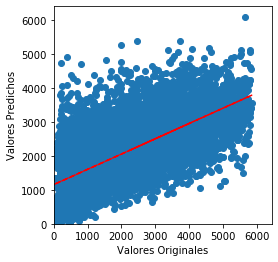

0.3996080252929266

In [17]:
model = ep.build_model(train_dataset)
ep.train_model(model, train_dataset, train_labels, 250)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, model)

### Subconjunto Literatura RFE  - Regresión Lineal con constante

----Resultados sobre TRAIN----
R2:  0.36910843685200234
Adjusted R2:  0.3688260745232773
MAPE: 74.09306113483059
----Resultados sobre TEST----
R2:  0.37153751998673945
Adjusted R2:  0.3706929069550271
MAPE: 72.80715948099694


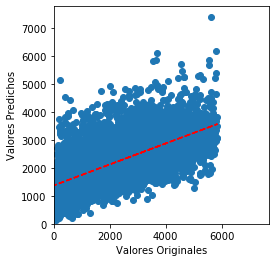

0.37153751998673945

In [18]:
lr = LinearRegression(fit_intercept=True)
lr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, lr)

### Subconjunto Literatura RFE  - Random Forest

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  4.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


----Resultados sobre TRAIN----
R2:  0.8794729482591898
Adjusted R2:  0.8794190050762534
MAPE: 26.81827411137665
----Resultados sobre TEST----
R2:  0.3547390091180197
Adjusted R2:  0.3538718199713533
MAPE: 64.1515905465618


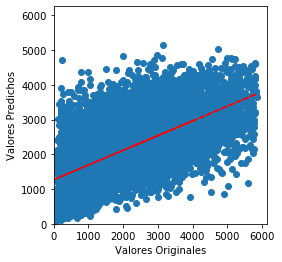

0.3547390091180197

In [19]:
regressor = RandomForestRegressor(100, criterion="mae", verbose=1, n_jobs=4)
regressor.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, regressor)

### Subconjunto Literatura RFE - Regresión de Soporte Vectorial

----Resultados sobre TRAIN----
R2:  0.364142053373152
Adjusted R2:  0.3638574682858955
MAPE: 70.39922043534162
----Resultados sobre TEST----
R2:  0.36601777961073334
Adjusted R2:  0.36516574840402805
MAPE: 69.12209559669186


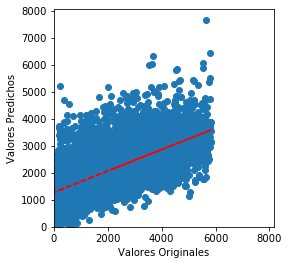

0.36601777961073334

In [20]:
svr = svm.SVR(kernel='linear')
svr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, svr)

# Subconjunto Literatura con RF


### Subconjunto Literatura RF - Regresión Lineal con constante

In [7]:
literatura_rf100 = ['EDAD', 'NOCHES', 'PERSONAS_TOTAL', 'INGRESOS', 'SEXO', 'ACTIV_PLAYA', 
                    'ACTIV_ISLA', 'PRIMERA_VISITA_CANARIAS', 'ACTIV_PASEAR', 
                    'ACTIV_PISCINA', 'ACTIV_GASTRONOMIA_CANARIA', 'ACTIV_OCIO']

#### Antes de evaluar los modelos con estas variables, vamos a echar un vistazo a su FIV para asegurarnos de que no haya multicolinealidad

In [8]:
X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=literatura_rf100, dummies=True, desglose=False)
print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)
fs.check_vif(X)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


(35767, 13)
         VIF                  variables
0   1.219937                       EDAD
1   1.062578                     NOCHES
2   1.066991             PERSONAS_TOTAL
3   1.053754                   INGRESOS
4   1.024180                       SEXO
5   1.142317                ACTIV_PLAYA
6   1.163508                 ACTIV_ISLA
7   1.091509    PRIMERA_VISITA_CANARIAS
8   1.132425               ACTIV_PASEAR
9   1.114058              ACTIV_PISCINA
10  1.099140  ACTIV_GASTRONOMIA_CANARIA
11  1.059736                 ACTIV_OCIO


En principio parece que no hemos detectado ningún FIV alarmante (en torno a 5), por lo que procederemos a predecir con nuestro subconjunto.

In [9]:
X['GASTO'] = y

train_dataset, test_dataset = dp.split_dataset(X)
train_labels = train_dataset.pop('GASTO')
test_labels = test_dataset.pop('GASTO')

### Subconjunto Literatura  RF - Red Neuronal 

Instructions for updating:
Colocations handled automatically by placer.
Train on 17972 samples, validate on 8853 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/250
 - 1s - loss: 793.3525 - mean_absolute_error: 793.3525 - mean_squared_error: 1101695.5000 - val_loss: 774.1321 - val_mean_absolute_error: 774.1320 - val_mean_squared_error: 1058426.1250
Epoch 2/250
 - 1s - loss: 763.8261 - mean_absolute_error: 763.8263 - mean_squared_error: 1018485.5000 - val_loss: 766.8231 - val_mean_absolute_error: 766.8235 - val_mean_squared_error: 1032352.5625
Epoch 3/250
 - 1s - loss: 760.8611 - mean_absolute_error: 760.8610 - mean_squared_error: 1009420.9375 - val_loss: 769.1324 - val_mean_absolute_error: 769.1321 - val_mean_squared_error: 1041434.3750
Epoch 4/250
 - 1s - loss: 758.1076 - mean_absolute_error: 758.1077 - mean_squared_error: 1004621.6250 - val_loss: 765.8472 - val_mean_absolute_error: 765.8473 - val_mean_squared_error: 1023947.8125
Epoch 5/250
 - 1s - loss: 757.1782 - me

Epoch 40/250
 - 1s - loss: 730.1716 - mean_absolute_error: 730.1718 - mean_squared_error: 937327.0625 - val_loss: 748.9119 - val_mean_absolute_error: 748.9121 - val_mean_squared_error: 984072.3125
Epoch 41/250
 - 1s - loss: 730.2438 - mean_absolute_error: 730.2435 - mean_squared_error: 936747.7500 - val_loss: 749.0909 - val_mean_absolute_error: 749.0910 - val_mean_squared_error: 981830.9375
Epoch 42/250
 - 1s - loss: 730.0173 - mean_absolute_error: 730.0168 - mean_squared_error: 936941.9375 - val_loss: 749.2297 - val_mean_absolute_error: 749.2300 - val_mean_squared_error: 980844.7500
Epoch 43/250
 - 1s - loss: 729.7097 - mean_absolute_error: 729.7096 - mean_squared_error: 935701.6250 - val_loss: 749.4084 - val_mean_absolute_error: 749.4085 - val_mean_squared_error: 982481.9375
Epoch 44/250
 - 1s - loss: 729.8085 - mean_absolute_error: 729.8083 - mean_squared_error: 936716.9375 - val_loss: 747.7147 - val_mean_absolute_error: 747.7150 - val_mean_squared_error: 980205.1250
Epoch 45/250
 -

Epoch 82/250
 - 1s - loss: 726.0617 - mean_absolute_error: 726.0618 - mean_squared_error: 927961.6250 - val_loss: 744.9284 - val_mean_absolute_error: 744.9285 - val_mean_squared_error: 974824.3125
Epoch 83/250
 - 1s - loss: 725.8650 - mean_absolute_error: 725.8645 - mean_squared_error: 928886.8750 - val_loss: 746.3308 - val_mean_absolute_error: 746.3307 - val_mean_squared_error: 975093.1250
Epoch 84/250
 - 1s - loss: 725.5931 - mean_absolute_error: 725.5932 - mean_squared_error: 927262.1250 - val_loss: 746.1668 - val_mean_absolute_error: 746.1666 - val_mean_squared_error: 977002.0625
Epoch 85/250
 - 1s - loss: 725.6203 - mean_absolute_error: 725.6207 - mean_squared_error: 928944.3750 - val_loss: 745.2240 - val_mean_absolute_error: 745.2238 - val_mean_squared_error: 975702.5625
Epoch 86/250
 - 1s - loss: 725.5205 - mean_absolute_error: 725.5211 - mean_squared_error: 927177.6875 - val_loss: 745.2900 - val_mean_absolute_error: 745.2901 - val_mean_squared_error: 976830.6250
Epoch 87/250
 -

Epoch 124/250
 - 1s - loss: 712.6835 - mean_absolute_error: 712.6837 - mean_squared_error: 900867.2500 - val_loss: 731.9379 - val_mean_absolute_error: 731.9382 - val_mean_squared_error: 946196.8750
Epoch 125/250
 - 1s - loss: 712.5690 - mean_absolute_error: 712.5690 - mean_squared_error: 900475.1875 - val_loss: 731.7473 - val_mean_absolute_error: 731.7476 - val_mean_squared_error: 945158.0625
Epoch 126/250
 - 1s - loss: 712.3986 - mean_absolute_error: 712.3987 - mean_squared_error: 900545.3750 - val_loss: 731.5437 - val_mean_absolute_error: 731.5439 - val_mean_squared_error: 942281.8750
Epoch 127/250
 - 1s - loss: 712.0775 - mean_absolute_error: 712.0778 - mean_squared_error: 899718.3125 - val_loss: 732.4533 - val_mean_absolute_error: 732.4532 - val_mean_squared_error: 943216.6875
Epoch 128/250
 - 1s - loss: 711.9541 - mean_absolute_error: 711.9539 - mean_squared_error: 899589.9375 - val_loss: 733.5190 - val_mean_absolute_error: 733.5187 - val_mean_squared_error: 944662.6875
Epoch 129/

Epoch 166/250
 - 1s - loss: 708.6517 - mean_absolute_error: 708.6514 - mean_squared_error: 893870.1250 - val_loss: 730.4123 - val_mean_absolute_error: 730.4124 - val_mean_squared_error: 939434.7500
Epoch 167/250
 - 1s - loss: 708.6268 - mean_absolute_error: 708.6269 - mean_squared_error: 893126.4375 - val_loss: 730.1405 - val_mean_absolute_error: 730.1404 - val_mean_squared_error: 939865.5000
Epoch 168/250
 - 1s - loss: 708.3440 - mean_absolute_error: 708.3439 - mean_squared_error: 892111.3125 - val_loss: 731.2337 - val_mean_absolute_error: 731.2338 - val_mean_squared_error: 940285.3125
Epoch 169/250
 - 1s - loss: 708.3342 - mean_absolute_error: 708.3343 - mean_squared_error: 892714.2500 - val_loss: 730.5146 - val_mean_absolute_error: 730.5148 - val_mean_squared_error: 939180.2500
Epoch 170/250
 - 1s - loss: 708.1305 - mean_absolute_error: 708.1306 - mean_squared_error: 892029.6250 - val_loss: 731.4404 - val_mean_absolute_error: 731.4406 - val_mean_squared_error: 939581.9375
Epoch 171/

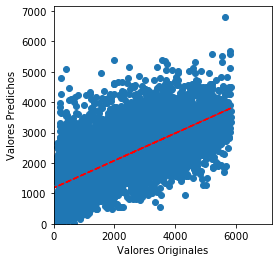

0.3953194198436668

In [10]:
model = ep.build_model(train_dataset)
ep.train_model(model, train_dataset, train_labels, 250)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, model)

### Subconjunto Literatura RF - Regresión Lineal con constante

----Resultados sobre TRAIN----
R2:  0.3687856398429532
Adjusted R2:  0.3685031330429426
MAPE: 73.84374346847756
----Resultados sobre TEST----
R2:  0.3706972607896809
Adjusted R2:  0.3698515185038119
MAPE: 72.53535183320666


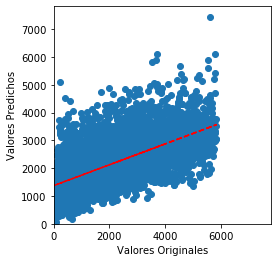

0.3706972607896809

In [11]:
lr = LinearRegression(fit_intercept=True)
lr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, lr)

### Subconjunto Literatura RF - Random Forest

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  4.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


----Resultados sobre TRAIN----
R2:  0.8724170263414934
Adjusted R2:  0.8723599252045435
MAPE: 28.16123323283457
----Resultados sobre TEST----
R2:  0.3382484435610943
Adjusted R2:  0.3373590921581078
MAPE: 66.8246703854989


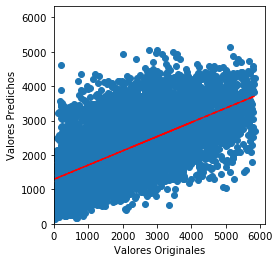

0.3382484435610943

In [12]:
regressor = RandomForestRegressor(100, criterion="mae", verbose=1, n_jobs=4)
regressor.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, regressor)

### Subconjunto Literatura RF - Regresión de Soporte Vectorial

----Resultados sobre TRAIN----
R2:  0.3639853849985687
Adjusted R2:  0.3637007297926901
MAPE: 68.91629077549788
----Resultados sobre TEST----
R2:  0.36481621147657717
Adjusted R2:  0.3639625654398114
MAPE: 67.73025052002258


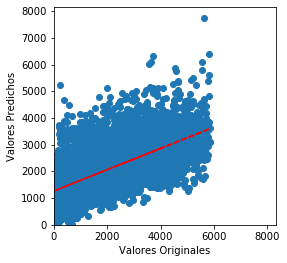

0.36481621147657717

In [13]:
svr = svm.SVR(kernel='linear')
svr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, svr)

# Subconjunto Todo con filtro correlación 0.1


In [68]:
todo_corr = ['TRIMESTRE_2018Q3', 'TIPO_PENSION_SOLO_ALOJAMIENTO', 'SERV_TRANSFERS',
             'PROPOSITO_NEGOCIOS_TRABAJO', 'PERSONAS_TOTAL',
             'PAQUETE_TURISTICO_SI', 'NOCHES_TF', 'NOCHES_LZ', 'NOCHES',
             'NACIONALIDAD_ESP724', 'MOTIVACION_1_DISFRUTAR_FAMILIA', 'INGRESOS',
             'HORAS_DIA', 'GRATIS_ALOJ', 'EDAD', 'COMPRA_ALOJ_COMPANNIA_ALOJAMIENTO',
             'COMPANNIA_SOLO', 'COMPANNIA_OTROS_FAMILIARES', 'COMPANNIA_HIJOS',
             'CANAL_TOUROPERADOR_AGENCIA_VIAJE', 'ANTELACION_VIAJE_MAS_DE_6_MESES',
             'ANTELACION_VIAJE_1-15_DIAS', 'ALOJ_CATEG_PARTICULAR',
             'ALOJ_CATEG_HOTEL5', 'ACTIV_PISCINA', 'ACTIV_PARQUES_OCIO']

#### Antes de evaluar los modelos con estas variables, vamos a echar un vistazo a su FIV para asegurarnos de que no haya multicolinealidad

In [69]:
X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=todo_corr, dummies=True, desglose=False)
print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)
fs.check_vif(X)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


(35767, 27)
         VIF                          variables
0   1.118424                   TRIMESTRE_2018Q3
1   1.288767      TIPO_PENSION_SOLO_ALOJAMIENTO
2   2.063816                     SERV_TRANSFERS
3   1.156468         PROPOSITO_NEGOCIOS_TRABAJO
4   1.979072                     PERSONAS_TOTAL
5   2.704209               PAQUETE_TURISTICO_SI
6   1.278403                          NOCHES_TF
7   1.174109                          NOCHES_LZ
8   1.327974                             NOCHES
9   1.258623                NACIONALIDAD_ESP724
10  1.234424     MOTIVACION_1_DISFRUTAR_FAMILIA
11  1.092209                           INGRESOS
12  1.180330                          HORAS_DIA
13  1.509314                        GRATIS_ALOJ
14  1.209182                               EDAD
15  1.413858  COMPRA_ALOJ_COMPANNIA_ALOJAMIENTO
16  1.392374                     COMPANNIA_SOLO
17  1.257466         COMPANNIA_OTROS_FAMILIARES
18  1.686063                    COMPANNIA_HIJOS
19  1.198588   CANAL_TOUROPE

En principio parece que no hemos detectado ningún FIV alarmante (en torno a 5), por lo que procederemos a predecir con nuestro subconjunto.

In [70]:
X['GASTO'] = y

train_dataset, test_dataset = dp.split_dataset(X)
train_labels = train_dataset.pop('GASTO')
test_labels = test_dataset.pop('GASTO')

### Subconjunto Todo con correlación 0.1 - Red Neuronal 

Train on 17972 samples, validate on 8853 samples
Epoch 1/250
 - 1s - loss: 661.8658 - mean_absolute_error: 661.8660 - mean_squared_error: 821666.8750 - val_loss: 639.6275 - val_mean_absolute_error: 639.6275 - val_mean_squared_error: 775591.6875
Epoch 2/250
 - 1s - loss: 625.1137 - mean_absolute_error: 625.1139 - mean_squared_error: 728092.6875 - val_loss: 629.2135 - val_mean_absolute_error: 629.2135 - val_mean_squared_error: 745162.7500
Epoch 3/250
 - 1s - loss: 620.8834 - mean_absolute_error: 620.8833 - mean_squared_error: 720154.1250 - val_loss: 630.1512 - val_mean_absolute_error: 630.1511 - val_mean_squared_error: 736897.5000
Epoch 4/250
 - 1s - loss: 618.2769 - mean_absolute_error: 618.2773 - mean_squared_error: 711388.9375 - val_loss: 631.4741 - val_mean_absolute_error: 631.4741 - val_mean_squared_error: 737568.0625
Epoch 5/250
 - 1s - loss: 616.5777 - mean_absolute_error: 616.5776 - mean_squared_error: 708474.6875 - val_loss: 637.0240 - val_mean_absolute_error: 637.0242 - val_mea

Epoch 43/250
 - 1s - loss: 593.3951 - mean_absolute_error: 593.3951 - mean_squared_error: 670156.0000 - val_loss: 622.3344 - val_mean_absolute_error: 622.3342 - val_mean_squared_error: 721827.9375
Epoch 44/250
 - 1s - loss: 592.8470 - mean_absolute_error: 592.8470 - mean_squared_error: 670214.7500 - val_loss: 621.0679 - val_mean_absolute_error: 621.0680 - val_mean_squared_error: 720374.7500
Epoch 45/250
 - 1s - loss: 592.5099 - mean_absolute_error: 592.5099 - mean_squared_error: 668300.5000 - val_loss: 622.6754 - val_mean_absolute_error: 622.6753 - val_mean_squared_error: 720394.4375
Epoch 46/250
 - 1s - loss: 592.0469 - mean_absolute_error: 592.0469 - mean_squared_error: 667793.6875 - val_loss: 622.0550 - val_mean_absolute_error: 622.0551 - val_mean_squared_error: 721396.1250
Epoch 47/250
 - 1s - loss: 591.7668 - mean_absolute_error: 591.7671 - mean_squared_error: 667738.6875 - val_loss: 621.6698 - val_mean_absolute_error: 621.6698 - val_mean_squared_error: 722267.1250
Epoch 48/250
 -

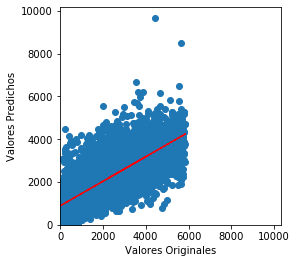

0.5338705038280747

In [72]:
model = ep.build_model(train_dataset)
ep.train_model(model, train_dataset, train_labels, 250)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, model)

### SubconjuntoTodo por correlación 0.1 - Regresión Lineal con constante

----Resultados sobre TRAIN----
R2:  0.5194919888017953
Adjusted R2:  0.5190257895223284
MAPE: 56.897654854710375
----Resultados sobre TEST----
R2:  0.5179251414232833
Adjusted R2:  0.5165192024078042
MAPE: 57.82507057894558


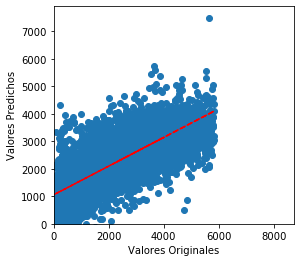

0.5179251414232833

In [73]:
lr = LinearRegression(fit_intercept=True)
lr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, lr)

### Subconjunto Todo por correlación 0.1 - Random Forest

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 10.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


----Resultados sobre TRAIN----
R2:  0.9310667810175133
Adjusted R2:  0.9309999005154779
MAPE: 20.01288161186239
----Resultados sobre TEST----
R2:  0.523011230599501
Adjusted R2:  0.5216201248222253
MAPE: 52.96362908502288


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


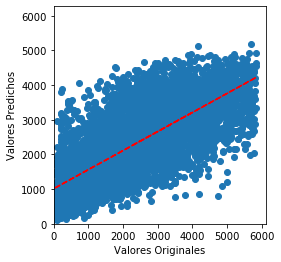

0.523011230599501

In [74]:
regressor = RandomForestRegressor(100, criterion="mae", verbose=1, n_jobs=4)
regressor.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, regressor)

### Subconjunto Todo por correlación 0.1 - Regresión de Soporte Vectorial

----Resultados sobre TRAIN----
R2:  0.5138809224040619
Adjusted R2:  0.5134092791464496
MAPE: 55.40761081379719
----Resultados sobre TEST----
R2:  0.5136216269029934
Adjusted R2:  0.5122031369758456
MAPE: 56.006537062535244


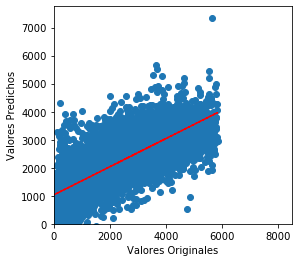

0.5136216269029934

In [75]:
svr = svm.SVR(kernel='linear')
svr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, svr)

# Subconjunto Todo con RF


In [49]:
todo_rf = ['IMPORTANCIA_OFERTA_CULTURAL', 'IMPORTANCIA_AUTENTICIDAD', 'IMPORTANCIA_VIAJE_SENCILLO', 'IMPORTANCIA_EXOTISMO',
         'NOCHES_TF', 'IMPORTANCIA_OFERTA_COMERCIAL', 'VISITAS_TOTAL_FV', 'IMPORTANCIA_EUROPA', 'IMPORTANCIA_DIVERSION',
         'RECOMENDAR_CANARIAS', 'IMPORTANCIA_GASTRONOMIA', 'VISITAS_TOTAL_LZ', 'INGRESOS', 'VISITAS_TOTAL_GC',
         'VOLVER_A_CANARIAS', 'PERSONAS_HOGAR', 'VISITAS_CANARIAS_5_ANNOS', 'NOCHES', 'HORAS_DIA', 'EDAD']

#### Antes de evaluar los modelos con estas variables, vamos a echar un vistazo a su FIV para asegurarnos de que no haya multicolinealidad

In [50]:
X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=todo_rf, dummies=True, desglose=False)
print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)
fs.check_vif(X)

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


(35767, 13)
         VIF                 variables
0   1.127910                 NOCHES_TF
1   1.093254          VISITAS_TOTAL_FV
2   2.814314       RECOMENDAR_CANARIAS
3   1.091927          VISITAS_TOTAL_LZ
4   1.057066                  INGRESOS
5   1.224232          VISITAS_TOTAL_GC
6   2.860595         VOLVER_A_CANARIAS
7   1.041735            PERSONAS_HOGAR
8   1.349950  VISITAS_CANARIAS_5_ANNOS
9   1.170067                    NOCHES
10  1.022599                 HORAS_DIA
11  1.116687                      EDAD


En principio parece que no hemos detectado ningún FIV alarmante (en torno a 5), por lo que procederemos a predecir con nuestro subconjunto.

In [42]:
X['GASTO'] = y

train_dataset, test_dataset = dp.split_dataset(X)
train_labels = train_dataset.pop('GASTO')
test_labels = test_dataset.pop('GASTO')

### Subconjunto Todo con Rf - Red Neuronal 

Train on 17972 samples, validate on 8853 samples
Epoch 1/250
 - 1s - loss: 900.7782 - mean_absolute_error: 900.7778 - mean_squared_error: 1413537.1250 - val_loss: 859.7411 - val_mean_absolute_error: 859.7413 - val_mean_squared_error: 1262090.3750
Epoch 2/250
 - 1s - loss: 860.9966 - mean_absolute_error: 860.9968 - mean_squared_error: 1277150.7500 - val_loss: 851.8712 - val_mean_absolute_error: 851.8717 - val_mean_squared_error: 1251923.8750
Epoch 3/250
 - 1s - loss: 855.6316 - mean_absolute_error: 855.6318 - mean_squared_error: 1261709.6250 - val_loss: 847.7422 - val_mean_absolute_error: 847.7420 - val_mean_squared_error: 1230099.6250
Epoch 4/250
 - 1s - loss: 851.1177 - mean_absolute_error: 851.1176 - mean_squared_error: 1247222.7500 - val_loss: 842.7178 - val_mean_absolute_error: 842.7175 - val_mean_squared_error: 1225239.7500
Epoch 5/250
 - 1s - loss: 845.6149 - mean_absolute_error: 845.6149 - mean_squared_error: 1227726.6250 - val_loss: 840.1568 - val_mean_absolute_error: 840.1566 

Epoch 42/250
 - 1s - loss: 801.2958 - mean_absolute_error: 801.2955 - mean_squared_error: 1123495.2500 - val_loss: 804.5614 - val_mean_absolute_error: 804.5613 - val_mean_squared_error: 1132151.2500
Epoch 43/250
 - 1s - loss: 801.7711 - mean_absolute_error: 801.7711 - mean_squared_error: 1123771.5000 - val_loss: 804.2766 - val_mean_absolute_error: 804.2766 - val_mean_squared_error: 1129116.2500
Epoch 44/250
 - 1s - loss: 801.0614 - mean_absolute_error: 801.0610 - mean_squared_error: 1123368.5000 - val_loss: 804.8780 - val_mean_absolute_error: 804.8782 - val_mean_squared_error: 1124916.5000
Epoch 45/250
 - 1s - loss: 800.8277 - mean_absolute_error: 800.8278 - mean_squared_error: 1123687.8750 - val_loss: 806.4820 - val_mean_absolute_error: 806.4819 - val_mean_squared_error: 1121150.3750
Epoch 46/250
 - 1s - loss: 800.6926 - mean_absolute_error: 800.6925 - mean_squared_error: 1121484.7500 - val_loss: 804.2875 - val_mean_absolute_error: 804.2872 - val_mean_squared_error: 1133328.6250
Epoch

Epoch 84/250
 - 1s - loss: 794.6404 - mean_absolute_error: 794.6402 - mean_squared_error: 1112181.5000 - val_loss: 801.5733 - val_mean_absolute_error: 801.5733 - val_mean_squared_error: 1126801.3750
Epoch 85/250
 - 1s - loss: 794.4820 - mean_absolute_error: 794.4819 - mean_squared_error: 1112980.6250 - val_loss: 802.1162 - val_mean_absolute_error: 802.1157 - val_mean_squared_error: 1121828.7500
Epoch 86/250
 - 1s - loss: 794.5707 - mean_absolute_error: 794.5704 - mean_squared_error: 1113221.6250 - val_loss: 801.2207 - val_mean_absolute_error: 801.2208 - val_mean_squared_error: 1125280.8750
Epoch 87/250
 - 1s - loss: 794.5840 - mean_absolute_error: 794.5842 - mean_squared_error: 1112709.5000 - val_loss: 804.4918 - val_mean_absolute_error: 804.4917 - val_mean_squared_error: 1118685.0000
Epoch 88/250
 - 1s - loss: 794.2936 - mean_absolute_error: 794.2929 - mean_squared_error: 1111610.6250 - val_loss: 801.9006 - val_mean_absolute_error: 801.9008 - val_mean_squared_error: 1125157.1250
Epoch

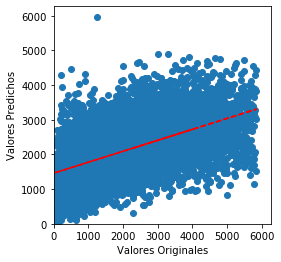

0.2612138109742601

In [43]:
model = ep.build_model(train_dataset)
ep.train_model(model, train_dataset, train_labels, 250)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, model)

### SubconjuntoTodo con RF - Regresión Lineal con constante

----Resultados sobre TRAIN----
R2:  0.2009279043270229
Adjusted R2:  0.20057027098568037
MAPE: 92.50495956202074
----Resultados sobre TEST----
R2:  0.2000594725407896
Adjusted R2:  0.1989844040751707
MAPE: 90.82966104637097


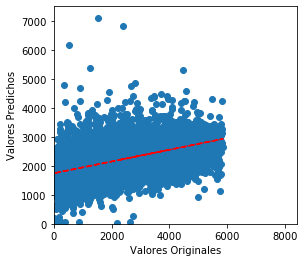

0.2000594725407896

In [44]:
lr = LinearRegression(fit_intercept=True)
lr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, lr)

### Subconjunto Todo con RF - Random Forest

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  5.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


----Resultados sobre TRAIN----
R2:  0.8845275529623766
Adjusted R2:  0.8844758720223329
MAPE: 31.0574835952036
----Resultados sobre TEST----
R2:  0.23971331786347472
Adjusted R2:  0.23869154160794348
MAPE: 80.3459739861918


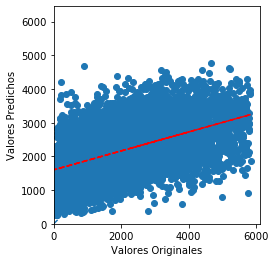

0.23971331786347472

In [45]:
regressor = RandomForestRegressor(100, criterion="mae", verbose=1, n_jobs=4)
regressor.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, regressor)

### Subconjunto Todo con RF - Regresión de Soporte Vectorial

----Resultados sobre TRAIN----
R2:  0.18820948644587765
Adjusted R2:  0.18784616083933392
MAPE: 84.97164663754323
----Resultados sobre TEST----
R2:  0.185896764557114
Adjusted R2:  0.18480266232558584
MAPE: 83.43913257471512


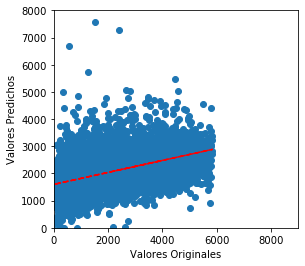

0.185896764557114

In [46]:
svr = svm.SVR(kernel='linear')
svr.fit(train_dataset, train_labels)
cm.evaluate_lin_lin(test_dataset, test_labels, train_dataset, train_labels, svr)

# KFold training  

Vamos a probar la configuración que nos ha dado el algoritmo evolutivo en el notebook darwin con un entrenamiento por validación cruzada

In [7]:
literatura_corr1 = ['NOCHES', 'PERSONAS_TOTAL', 'INGRESOS', 'EDAD', 'ACTIV_PISCINA',
                    'ACTIV_PARQUES_OCIO', 'ALOJ_CATEG_HOTEL4', 'ALOJ_CATEG_HOTEL5',
                    'ALOJ_CATEG_PROPIA', 'PAQUETE_TURISTICO_ALGUNO_GRATIS',
                    'PAQUETE_TURISTICO_SI', 'NACIONALIDAD_ESP724']

X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=literatura_corr1, dummies=True, desglose=False)
print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

X['GASTO'] = y

train_dataset, test_dataset = dp.split_dataset(X)
train_labels = train_dataset.pop('GASTO')
test_labels = test_dataset.pop('GASTO')

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(35767, 13)


C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


Train on 14378 samples, validate on 7082 samples
Epoch 1/250
 - 1s - loss: 1379.6938 - mean_absolute_error: 1379.6935 - mean_squared_error: 3313705.0000 - val_loss: 709.1147 - val_mean_absolute_error: 709.1148 - val_mean_squared_error: 942426.7500
Epoch 2/250
 - 1s - loss: 673.1351 - mean_absolute_error: 673.1345 - mean_squared_error: 832444.5625 - val_loss: 650.3586 - val_mean_absolute_error: 650.3586 - val_mean_squared_error: 799043.3125
Epoch 3/250
 - 1s - loss: 635.4004 - mean_absolute_error: 635.4002 - mean_squared_error: 745939.1250 - val_loss: 624.8545 - val_mean_absolute_error: 624.8546 - val_mean_squared_error: 730542.8750
Epoch 4/250
 - 1s - loss: 629.0476 - mean_absolute_error: 629.0479 - mean_squared_error: 733090.4375 - val_loss: 624.3700 - val_mean_absolute_error: 624.3699 - val_mean_squared_error: 730637.4375
Epoch 5/250
 - 1s - loss: 626.3303 - mean_absolute_error: 626.3304 - mean_squared_error: 726683.8750 - val_loss: 622.2776 - val_mean_absolute_error: 622.2775 - val_

Epoch 43/250
 - 1s - loss: 618.6302 - mean_absolute_error: 618.6302 - mean_squared_error: 711045.5625 - val_loss: 617.5809 - val_mean_absolute_error: 617.5810 - val_mean_squared_error: 713966.6250
Epoch 44/250
 - 1s - loss: 618.4381 - mean_absolute_error: 618.4379 - mean_squared_error: 711465.8125 - val_loss: 617.6810 - val_mean_absolute_error: 617.6810 - val_mean_squared_error: 712449.9375
Epoch 45/250
 - 1s - loss: 618.3214 - mean_absolute_error: 618.3218 - mean_squared_error: 711035.0625 - val_loss: 617.5001 - val_mean_absolute_error: 617.5001 - val_mean_squared_error: 713815.5000
Epoch 46/250
 - 1s - loss: 618.1874 - mean_absolute_error: 618.1873 - mean_squared_error: 710788.3125 - val_loss: 617.3949 - val_mean_absolute_error: 617.3950 - val_mean_squared_error: 713044.3125
Epoch 47/250
 - 1s - loss: 618.1100 - mean_absolute_error: 618.1099 - mean_squared_error: 710719.1875 - val_loss: 617.3367 - val_mean_absolute_error: 617.3366 - val_mean_squared_error: 713717.7500
Epoch 48/250
 -

Epoch 85/250
 - 1s - loss: 614.6869 - mean_absolute_error: 614.6870 - mean_squared_error: 705416.0000 - val_loss: 615.4520 - val_mean_absolute_error: 615.4518 - val_mean_squared_error: 707679.5625
Epoch 86/250
 - 1s - loss: 614.6377 - mean_absolute_error: 614.6379 - mean_squared_error: 704776.2500 - val_loss: 615.9820 - val_mean_absolute_error: 615.9821 - val_mean_squared_error: 708071.5000
Epoch 87/250
 - 1s - loss: 614.5248 - mean_absolute_error: 614.5245 - mean_squared_error: 704664.8125 - val_loss: 615.0618 - val_mean_absolute_error: 615.0616 - val_mean_squared_error: 708238.9375
Epoch 88/250
 - 1s - loss: 614.4162 - mean_absolute_error: 614.4163 - mean_squared_error: 704636.4375 - val_loss: 615.1275 - val_mean_absolute_error: 615.1275 - val_mean_squared_error: 708186.5000
Epoch 89/250
 - 1s - loss: 614.3886 - mean_absolute_error: 614.3887 - mean_squared_error: 704887.0000 - val_loss: 615.0615 - val_mean_absolute_error: 615.0616 - val_mean_squared_error: 707882.8125
Epoch 90/250
 -

Epoch 127/250
 - 1s - loss: 611.7975 - mean_absolute_error: 611.7975 - mean_squared_error: 701467.0000 - val_loss: 614.2397 - val_mean_absolute_error: 614.2396 - val_mean_squared_error: 707062.8125
Epoch 128/250
 - 1s - loss: 611.7474 - mean_absolute_error: 611.7476 - mean_squared_error: 701014.5625 - val_loss: 614.2435 - val_mean_absolute_error: 614.2433 - val_mean_squared_error: 706788.1875
Epoch 129/250
 - 1s - loss: 611.6722 - mean_absolute_error: 611.6719 - mean_squared_error: 700780.4375 - val_loss: 614.2642 - val_mean_absolute_error: 614.2640 - val_mean_squared_error: 706918.4375
Epoch 130/250
 - 1s - loss: 611.5827 - mean_absolute_error: 611.5828 - mean_squared_error: 700531.8125 - val_loss: 614.2631 - val_mean_absolute_error: 614.2631 - val_mean_squared_error: 707631.5625
Epoch 131/250
 - 1s - loss: 611.5033 - mean_absolute_error: 611.5031 - mean_squared_error: 700543.0625 - val_loss: 613.9696 - val_mean_absolute_error: 613.9695 - val_mean_squared_error: 707632.1250
Epoch 132/

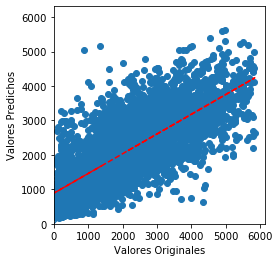

Train on 14378 samples, validate on 7082 samples
Epoch 1/250
 - 1s - loss: 611.8082 - mean_absolute_error: 611.8079 - mean_squared_error: 695825.6875 - val_loss: 613.8010 - val_mean_absolute_error: 613.8012 - val_mean_squared_error: 707469.3125
Epoch 2/250
 - 1s - loss: 611.5182 - mean_absolute_error: 611.5180 - mean_squared_error: 696019.6250 - val_loss: 613.5412 - val_mean_absolute_error: 613.5413 - val_mean_squared_error: 706022.3125
Epoch 3/250
 - 1s - loss: 611.1890 - mean_absolute_error: 611.1888 - mean_squared_error: 694949.9375 - val_loss: 613.5096 - val_mean_absolute_error: 613.5095 - val_mean_squared_error: 706132.4375
Epoch 4/250
 - 1s - loss: 611.0220 - mean_absolute_error: 611.0220 - mean_squared_error: 694846.2500 - val_loss: 613.3768 - val_mean_absolute_error: 613.3766 - val_mean_squared_error: 706101.6250
Epoch 5/250
 - 1s - loss: 610.9091 - mean_absolute_error: 610.9093 - mean_squared_error: 694562.0000 - val_loss: 613.3215 - val_mean_absolute_error: 613.3214 - val_mea

Epoch 43/250
 - 1s - loss: 607.1967 - mean_absolute_error: 607.1967 - mean_squared_error: 689385.3125 - val_loss: 612.2773 - val_mean_absolute_error: 612.2772 - val_mean_squared_error: 705509.5625
Epoch 44/250
 - 1s - loss: 607.1247 - mean_absolute_error: 607.1246 - mean_squared_error: 689307.8125 - val_loss: 612.3962 - val_mean_absolute_error: 612.3963 - val_mean_squared_error: 703950.3125
Epoch 45/250
 - 1s - loss: 607.0333 - mean_absolute_error: 607.0333 - mean_squared_error: 688608.6875 - val_loss: 612.2554 - val_mean_absolute_error: 612.2557 - val_mean_squared_error: 705365.2500
Epoch 46/250
 - 1s - loss: 606.9800 - mean_absolute_error: 606.9797 - mean_squared_error: 689194.9375 - val_loss: 612.2011 - val_mean_absolute_error: 612.2012 - val_mean_squared_error: 705602.7500
Epoch 47/250
 - 1s - loss: 606.8197 - mean_absolute_error: 606.8195 - mean_squared_error: 688683.8125 - val_loss: 612.3530 - val_mean_absolute_error: 612.3533 - val_mean_squared_error: 704245.1250
Epoch 48/250
 -

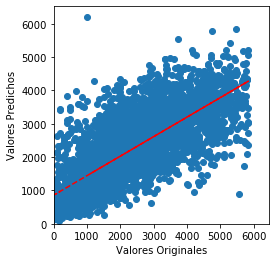

Train on 14378 samples, validate on 7082 samples
Epoch 1/250
 - 1s - loss: 611.3069 - mean_absolute_error: 611.3069 - mean_squared_error: 694182.3125 - val_loss: 612.6296 - val_mean_absolute_error: 612.6297 - val_mean_squared_error: 707456.6250
Epoch 2/250
 - 1s - loss: 611.1597 - mean_absolute_error: 611.1594 - mean_squared_error: 694685.4375 - val_loss: 612.2647 - val_mean_absolute_error: 612.2645 - val_mean_squared_error: 704576.5000
Epoch 3/250
 - 1s - loss: 610.9265 - mean_absolute_error: 610.9263 - mean_squared_error: 693673.3750 - val_loss: 612.6112 - val_mean_absolute_error: 612.6109 - val_mean_squared_error: 707785.1875
Epoch 4/250
 - 1s - loss: 610.8149 - mean_absolute_error: 610.8152 - mean_squared_error: 694123.5000 - val_loss: 612.5412 - val_mean_absolute_error: 612.5414 - val_mean_squared_error: 705899.4375
Epoch 5/250
 - 1s - loss: 610.6801 - mean_absolute_error: 610.6805 - mean_squared_error: 693683.4375 - val_loss: 612.6853 - val_mean_absolute_error: 612.6855 - val_mea

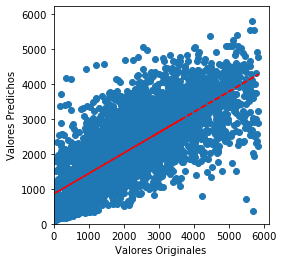

Train on 14378 samples, validate on 7082 samples
Epoch 1/250
 - 1s - loss: 606.3872 - mean_absolute_error: 606.3875 - mean_squared_error: 681720.0625 - val_loss: 615.0252 - val_mean_absolute_error: 615.0252 - val_mean_squared_error: 716509.0625
Epoch 2/250
 - 1s - loss: 606.3449 - mean_absolute_error: 606.3448 - mean_squared_error: 682011.0000 - val_loss: 615.0353 - val_mean_absolute_error: 615.0352 - val_mean_squared_error: 714223.8125
Epoch 3/250
 - 1s - loss: 605.9693 - mean_absolute_error: 605.9691 - mean_squared_error: 681405.8125 - val_loss: 615.1000 - val_mean_absolute_error: 615.0999 - val_mean_squared_error: 716855.8125
Epoch 4/250
 - 1s - loss: 606.0029 - mean_absolute_error: 606.0034 - mean_squared_error: 681624.6875 - val_loss: 614.9090 - val_mean_absolute_error: 614.9089 - val_mean_squared_error: 715907.8125
Epoch 5/250
 - 1s - loss: 605.8103 - mean_absolute_error: 605.8102 - mean_squared_error: 681308.1875 - val_loss: 614.8315 - val_mean_absolute_error: 614.8317 - val_mea

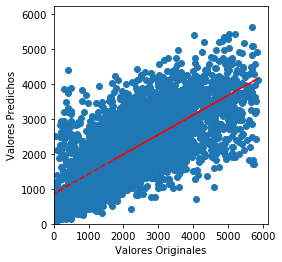

Train on 14378 samples, validate on 7082 samples
Epoch 1/250
 - 1s - loss: 604.3883 - mean_absolute_error: 604.3882 - mean_squared_error: 679112.5625 - val_loss: 610.0781 - val_mean_absolute_error: 610.0781 - val_mean_squared_error: 700890.3750
Epoch 2/250
 - 1s - loss: 604.2981 - mean_absolute_error: 604.2983 - mean_squared_error: 678806.5000 - val_loss: 610.2213 - val_mean_absolute_error: 610.2212 - val_mean_squared_error: 702004.9375
Epoch 3/250
 - 1s - loss: 604.2511 - mean_absolute_error: 604.2512 - mean_squared_error: 678612.4375 - val_loss: 610.2972 - val_mean_absolute_error: 610.2972 - val_mean_squared_error: 701338.6250
Epoch 4/250
 - 1s - loss: 604.0979 - mean_absolute_error: 604.0979 - mean_squared_error: 678678.9375 - val_loss: 610.4566 - val_mean_absolute_error: 610.4568 - val_mean_squared_error: 700689.6875
Epoch 5/250
 - 1s - loss: 604.0651 - mean_absolute_error: 604.0650 - mean_squared_error: 678322.5000 - val_loss: 610.3845 - val_mean_absolute_error: 610.3846 - val_mea

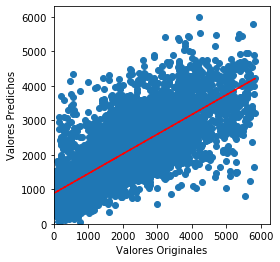

----Resultados sobre TRAIN----
R2:  0.5485190972111544
Adjusted R2:  0.5483170320599734
MAPE: 48.66287875696397
----Resultados sobre TEST----
R2:  0.5361567966272305
Adjusted R2:  0.535533421283914
MAPE: 49.18123009381437


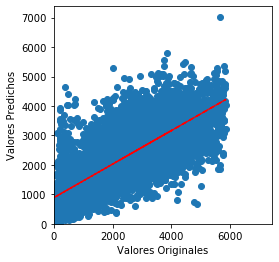

In [8]:
#Darwin
model = get_model(train_dataset)
ep.KFold_train_model(model, train_dataset, train_labels, test_dataset, test_labels, 250, 5, lin_lin=True)

Guardamos el modelo en un fichero

In [10]:
model.save('./modelo_definitivo.h5')

## Evaluación

In [2]:
model_definitivo = tf.keras.models.load_model('./modelo_definitivo.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
literatura_corr1 = ['NOCHES', 'PERSONAS_TOTAL', 'INGRESOS', 'EDAD', 'ACTIV_PISCINA',
                    'ACTIV_PARQUES_OCIO', 'ALOJ_CATEG_HOTEL4', 'ALOJ_CATEG_HOTEL5',
                    'ALOJ_CATEG_PROPIA', 'PAQUETE_TURISTICO_ALGUNO_GRATIS',
                    'PAQUETE_TURISTICO_SI', 'NACIONALIDAD_ESP724']

X = dp.load_dataset('./datos/GASTO_TURISTICO_2018_ORIGINAL_2.csv', ';', ',', predictors=literatura_corr1, dummies=True, desglose=False)
print(X.shape)
scaler = StandardScaler()

y = X.pop('GASTO')
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

X['GASTO'] = y

c:\users\amct2\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(35767, 13)


C:\Users\amct2\PycharmProjects\tfg\data_preprocessing.py:102: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(y > q1 - IQR)]


In [4]:
sample = X.sample(10)
real = sample.pop('GASTO')
display(sample.head)

<bound method NDFrame.head of          NOCHES  PERSONAS_TOTAL  INGRESOS      EDAD  ACTIV_PISCINA  \
12726 -0.353816        1.286975  0.743213  1.445783      -1.174340   
5732   1.447450       -0.405225  1.345426  0.230306      -1.174340   
16321 -0.353816       -0.405225  1.345426  1.108150       0.851542   
16983  0.932803       -0.405225  0.743213 -0.242379      -1.174340   
9160   0.932803        1.286975  0.743213 -0.580012       0.851542   
13657 -0.611139        0.440875 -1.549827 -1.255277      -1.174340   
24797  0.160832        1.286975  0.743213 -0.512485       0.851542   
35753  1.962098       -1.251326 -0.414888  0.162779      -1.174340   
35577  3.248716       -0.405225  0.743213  1.513309      -1.174340   
12894 -0.353816       -0.405225 -0.414888 -1.322803       0.851542   

       ACTIV_PARQUES_OCIO  ALOJ_CATEG_HOTEL4  ALOJ_CATEG_HOTEL5  \
12726           -0.428341           1.348936          -0.250571   
5732            -0.428341          -0.741325          -0.250571  

In [5]:
predicted = model_definitivo.predict(sample)

for pv, rv, in zip(predicted, real):
    print(pv, rv)

[3491.5684] 2685.4345
[2512.9355] 1999.7599999999998
[2239.277] 1303.8763
[2146.086] 1800.0
[3626.536] 2918.8799999999997
[767.8518] 645.12
[3961.3281] 3712.3366
[594.7874] 950.08
[4117.271] 3800.16
[1622.0599] 934.7671


In [6]:
print(model_definitivo.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 27)                351       
_________________________________________________________________
dense_9 (Dense)              (None, 36)                1008      
_________________________________________________________________
dense_10 (Dense)             (None, 27)                999       
_________________________________________________________________
dense_11 (Dense)             (None, 53)                1484      
_________________________________________________________________
dense_12 (Dense)             (None, 45)                2430      
_________________________________________________________________
dense_13 (Dense)             (None, 56)                2576      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                1140      
__________